In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [56]:
dataSet = pd.read_csv("loan.csv")
dataSet.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban


In [43]:
dataSet.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

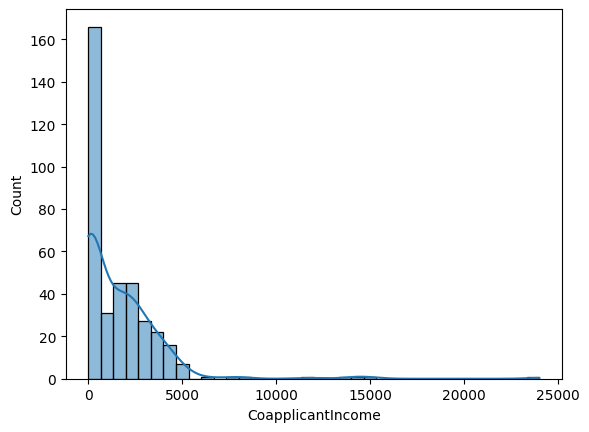

In [44]:
sns.histplot(dataSet["CoapplicantIncome"],kde=True)
plt.show()

In [45]:
q1 = dataSet["CoapplicantIncome"].quantile(0.25)
q3 = dataSet["CoapplicantIncome"].quantile(0.75)
iqr = q3 - q1

In [46]:
min_r = q1 - (1.5*iqr)
max_r = q3+(1.5*iqr)
min_r, max_r

(-3645.75, 6076.25)

In [47]:
dataSet = dataSet[dataSet["CoapplicantIncome"]<=max_r]

In [48]:
from sklearn.preprocessing import FunctionTransformer

In [49]:
ft = FunctionTransformer(func=np.log1p)
ft.fit(dataSet[["CoapplicantIncome"]])

FunctionTransformer(func=<ufunc 'log1p'>)

In [50]:
dataSet["CoapplicantIncome_tf"] = ft.transform(dataSet[["CoapplicantIncome"]])

In [51]:
dataSet

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,CoapplicantIncome_tf
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,0.000000
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,7.313887
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,7.496097
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,7.842671
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,7.483244
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,6.565265
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban,7.597898
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,7.780721


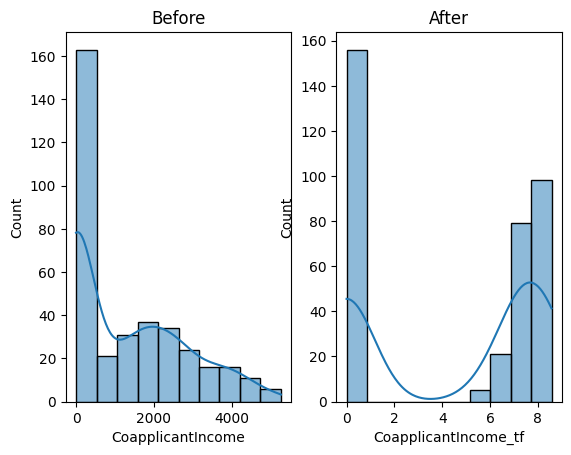

In [52]:
plt.Figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title("Before")
sns.histplot(dataSet["CoapplicantIncome"],kde=True)

plt.subplot(1,2,2)
plt.title("After")
sns.histplot(dataSet["CoapplicantIncome_tf"],kde=True)
plt.show()

In [58]:
ft1 = FunctionTransformer(func=lambda x : x**2)
ft1.fit(dataSet[["CoapplicantIncome"]])

dataSet["CoapplicantIncome_tf1"] = ft.transform(dataSet[["CoapplicantIncome"]])

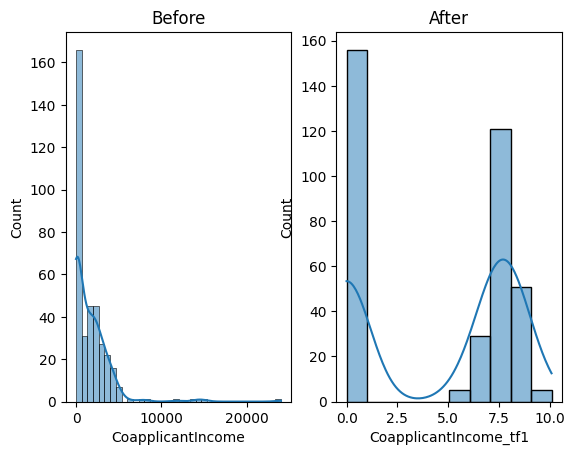

In [59]:
plt.Figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title("Before")
sns.histplot(dataSet["CoapplicantIncome"],kde=True)

plt.subplot(1,2,2)
plt.title("After")
sns.histplot(dataSet["CoapplicantIncome_tf1"],kde=True)


plt.show()